In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
orders = pd.read_csv('./orders.csv')
payments = pd.read_csv('./payments.csv')
plan = pd.read_csv('./plan.csv')

## Исследование данных

In [117]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55748 entries, 0 to 55747
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    55748 non-null  int64  
 1   created_at  55748 non-null  object 
 2   put_at      55748 non-null  object 
 3   closed_at   46472 non-null  object 
 4   issued_sum  55748 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB


In [118]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143284 entries, 0 to 143283
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   order_id  143284 non-null  int64  
 1   paid_at   143284 non-null  object 
 2   paid_sum  143284 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ MB


In [11]:
plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420282 entries, 0 to 420281
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        420282 non-null  int64  
 1   plan_at         420282 non-null  object 
 2   plan_sum_total  420282 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.6+ MB


In [119]:
len(orders)

55748

In [72]:
len(payments)

143284

In [69]:
len(plan)

420282

In [8]:
orders.head()

,order_id,created_at,put_at,closed_at,issued_sum
0,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0
1,400005838,2022-06-02 00:10:22.997,2022-06-02 15:41:33.267,2022-06-02 17:38:43.917,20000.0
2,400007915,2022-06-02 00:18:04.000,2022-06-05 19:17:38.547,2022-06-21 21:55:51.877,5820.0
3,400008952,2022-06-02 00:22:07.000,2022-06-03 14:25:18.033,2022-07-12 10:47:46.307,9000.0
4,400009027,2022-06-02 00:25:39.000,2022-06-02 00:40:40.320,2022-06-22 14:15:07.423,5000.0


In [12]:
payments.head()

,order_id,paid_at,paid_sum
0,400013633,2022-06-02 00:48:13.800,2500.0
1,400018480,2022-06-02 01:52:05.707,1070.0
2,400032001,2022-06-02 04:55:40.307,4200.0
3,400033195,2022-06-02 05:44:23.480,2850.0
4,400039407,2022-06-02 06:53:54.503,10100.0


In [13]:
plan.head()

,order_id,plan_at,plan_sum_total
0,400001732,2022-06-02,5600.0
1,400001732,2022-07-02,9450.0
2,400001732,2022-08-01,12170.0
3,400001732,2022-08-31,14890.0
4,400001732,2022-09-30,17610.0


Посмотрим, есть ли поля с пустыми значениями

In [29]:
orders.isna().sum()

order_id         0
created_at       0
put_at           0
closed_at     9276
issued_sum       0
dtype: int64

In [30]:
payments.isna().sum()

order_id    0
paid_at     0
paid_sum    0
dtype: int64

In [31]:
plan.isna().sum()

order_id          0
plan_at           0
plan_sum_total    0
dtype: int64

Пустых значений в других таблицах нет. В orders пустое поле closed_at означает,что кредит еще действующий. Для удобства добавим флаг closed.

True будет означать, что кредит закрыт

False - еще действует

In [150]:
orders['closed'] = ~(orders['closed_at'].isna())
##общее число действующих кредитов
len(orders[orders['closed']==False])

9276

Проверим также на дубли в таблице orders

In [140]:
orders['order_id'].duplicated().sum()

np.int64(0)

Создадим доп поле index_number для объединения таблиц plan и payments

In [151]:
plan =plan.sort_values(by=['order_id', 'plan_at'])
plan['index_number'] = plan.groupby(by='order_id').cumcount()

payments =payments.sort_values(by=['order_id', 'paid_at'])
payments['index_number'] = payments.groupby(by='order_id').cumcount()

In [185]:
df_payments_plan = payments.merge(plan, on=['order_id', 'index_number'], how='inner')
df_payments_plan

,order_id,paid_at,paid_sum,index_number,plan_at,plan_sum_total
0,400001732,2022-06-02 20:20:16.790,5600.00,0,2022-06-02,5600.00
1,400001732,2022-06-16 16:05:26.007,3850.00,1,2022-07-02,9450.00
2,400001732,2022-07-15 12:32:34.087,2720.00,2,2022-08-01,12170.00
3,400001732,2022-08-16 12:38:01.237,2720.00,3,2022-08-31,14890.00
4,400001732,2022-09-15 12:14:48.867,2720.00,4,2022-09-30,17610.00
...,...,...,...,...,...,...
142048,495177509,2022-10-19 03:38:53.250,2762.32,5,2022-11-07,26183.72
142049,495177509,2022-10-21 01:13:10.547,2725.32,6,2022-11-22,28909.04
142050,495177509,2022-10-21 05:23:00.557,2688.33,7,2022-12-07,31597.37
142051,495177509,2022-10-23 15:21:43.243,2651.33,8,2022-12-22,34248.70


In [186]:
df_payments_plan['paid_at']  = pd.to_datetime(df_payments_plan['paid_at']) 
df_payments_plan['plan_at']  = pd.to_datetime(df_payments_plan['plan_at']) 


Посчитаем количество дней просрочки

In [188]:
df_payments_plan['delays'] = (df_payments_plan['plan_at'] - df_payments_plan['paid_at']).dt.days  
df_payments_plan['delays'] = df_payments_plan['delays'].apply(lambda x: 0 if x<1  else x)
df_payments_plan

,order_id,paid_at,paid_sum,index_number,plan_at,plan_sum_total,delays
0,400001732,2022-06-02 20:20:16.790,5600.00,0,2022-06-02,5600.00,0
1,400001732,2022-06-16 16:05:26.007,3850.00,1,2022-07-02,9450.00,15
2,400001732,2022-07-15 12:32:34.087,2720.00,2,2022-08-01,12170.00,16
3,400001732,2022-08-16 12:38:01.237,2720.00,3,2022-08-31,14890.00,14
4,400001732,2022-09-15 12:14:48.867,2720.00,4,2022-09-30,17610.00,14
...,...,...,...,...,...,...,...
142048,495177509,2022-10-19 03:38:53.250,2762.32,5,2022-11-07,26183.72,18
142049,495177509,2022-10-21 01:13:10.547,2725.32,6,2022-11-22,28909.04,31
142050,495177509,2022-10-21 05:23:00.557,2688.33,7,2022-12-07,31597.37,46
142051,495177509,2022-10-23 15:21:43.243,2651.33,8,2022-12-22,34248.70,59


Найдем сумму просрочек по дням для каждого месяца

In [264]:
df_payments_plan['month'] = df_payments_plan['plan_at'].dt.to_period('M')
delay_by_months = df_payments_plan.groupby('month')['paid_sum'].sum()
delay_by_months

month
2022-06    6.738254e+07
2022-07    1.553741e+08
2022-08    1.764116e+08
2022-09    1.050847e+08
2022-10    3.172942e+07
2022-11    1.465809e+07
2022-12    4.457852e+06
2023-01    4.380495e+05
2023-02    5.105618e+04
2023-03    5.000000e+02
Freq: M, Name: paid_sum, dtype: float64

Отобразим на графике:

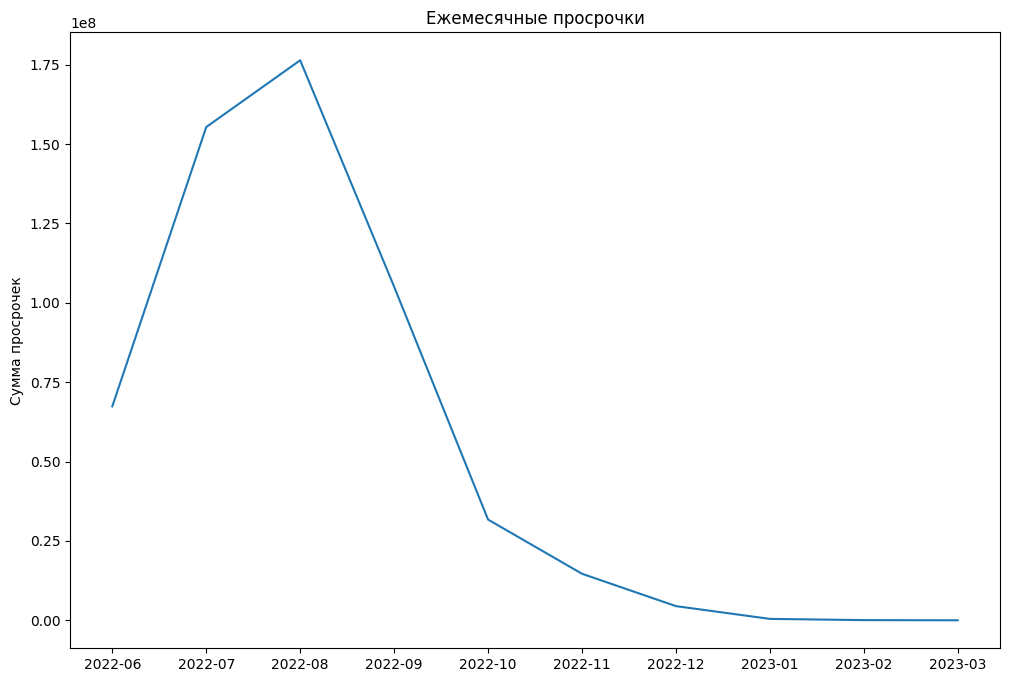

In [265]:
plt.figure(figsize=(12,8))
plt.plot(delay_by_months.index.astype(str), delay_by_months.values)
plt.ylabel('Сумма просрочек')
plt.title('Ежемесячные просрочки')
plt.show()

По графику видно, что было много просрочек в агусте и в сентябре 2022.Далее идет медленный спад

Посчитаем теперь среднее кол-во дней по просчкам по каждому месяцу: 

In [202]:
mean = df_payments_plan.groupby('month')['delays'].mean()
mean

month
2022-06     1.148846
2022-07     2.133626
2022-08     2.762628
2022-09     4.359070
2022-10     6.864064
2022-11     8.944719
2022-12    19.302557
2023-01    56.603704
2023-02    78.709677
2023-03    89.000000
Freq: M, Name: delays, dtype: float64

Посмотрим,что было в марте 2023

In [206]:
df_payments_plan[df_payments_plan['month']=='2023-03']

,order_id,paid_at,paid_sum,index_number,plan_at,plan_sum_total,delays,month
141729,494937951,2022-12-06 09:16:55.850,500.0,12,2023-03-06,24649.52,89,2023-03


Среднее нам не дает верной картины происходящего. Тогда посчитаем кол-во просроченных и непросроченных платежей  по каждому месяцу

In [235]:
count_dalays= df_payments_plan[df_payments_plan['delays']>0].groupby('month')['delays'].count() 

In [236]:
count_on_times = df_payments_plan[df_payments_plan['delays']==0].groupby('month')['delays'].count() 

In [237]:
count_on_times

month
2022-06    13809
2022-07    24745
2022-08    28308
2022-09    14766
2022-10     6544
2022-11     3505
2022-12      458
Freq: M, Name: delays, dtype: int64

In [238]:
count_dalays

month
2022-06     2651
2022-07     9612
2022-08    13344
2022-09    11655
2022-10     6521
2022-11     3984
2022-12     1849
2023-01      270
2023-02       31
2023-03        1
Freq: M, Name: delays, dtype: int64

In [254]:
combined = pd.DataFrame({
    'delays': count_dalays,
    'on_time': count_on_times
}).fillna(0)


In [255]:
combined

,delays,on_time
month,,
2022-06,2651,13809.0
2022-07,9612,24745.0
2022-08,13344,28308.0
2022-09,11655,14766.0
2022-10,6521,6544.0
2022-11,3984,3505.0
2022-12,1849,458.0
2023-01,270,0.0
2023-02,31,0.0


Построим график 

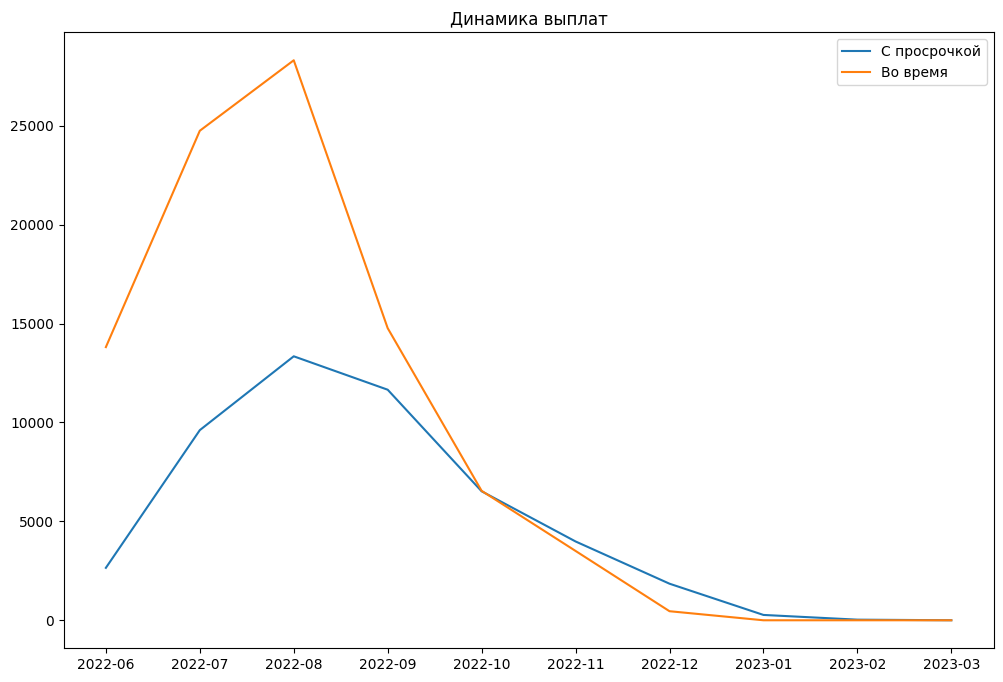

In [257]:
plt.figure(figsize=(12,8)) 
plt.title('Динамика выплат')
plt.plot(combined.index.astype(str), combined['delays'], label='С просрочкой')
plt.plot(combined.index.astype(str), combined['on_time'], label='Во время')
plt.legend()
plt.show()

<Axes: xlabel='month'>

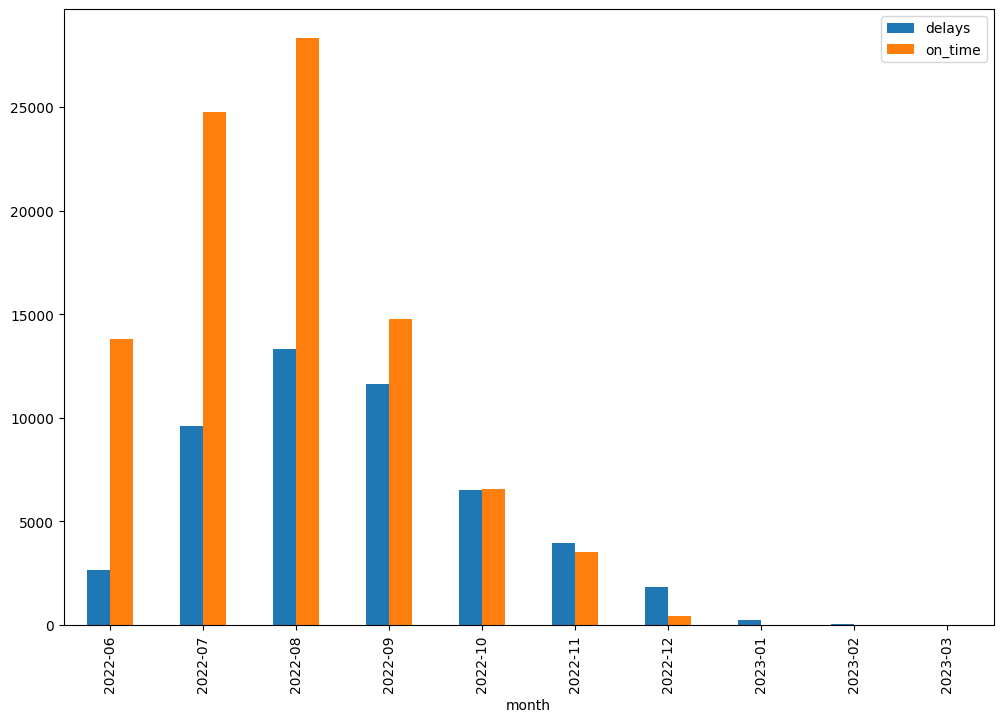

In [258]:
combined.plot(kind='bar', figsize=(12, 8))

In [261]:
combined['percent_delays'] = round(combined['delays']/(combined['delays']+combined['on_time'])*100,2)
combined

,delays,on_time,percent_delays
month,,,
2022-06,2651,13809.0,16.11
2022-07,9612,24745.0,27.98
2022-08,13344,28308.0,32.04
2022-09,11655,14766.0,44.11
2022-10,6521,6544.0,49.91
2022-11,3984,3505.0,53.20
2022-12,1849,458.0,80.15
2023-01,270,0.0,100.00
2023-02,31,0.0,100.00


# Итог

Несмотря на большое количество выплат в июле-августе, наблюдается постепенное увеличение просроченных выплат. Начиная с 2023 года все выплаты осуществляются не по расписанию. Необходимо определить процент допустимых просрочек в месяц и выявить причины такого поведения клиентов.